# CSCE 633 :: Machine Learning :: Texas A&M University :: Fall 2023

# Homework 4 (HW-4)
**Name: Siddharrth Priyadharsan Muthusamy**  
**UIN: 434002400 **  

### Unsupervised Machine Learning

In [144]:
# Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot_graph
import warnings

from numpy import *
from typing import Tuple

from skimage.color import rgb2gray
from scipy.stats import pearsonr, skew
import seaborn as plot_heatmap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

### A: Data exploration

In this section, we would do the following:
1) Fetch the data from the csv file
2) filter out the records which have empty cell(s)
3) visualize the histograms of the variables (features) in the data

In [145]:
# reading data from the data.csv file
file_path = "data.csv"
df = pd.read_csv(file_path)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


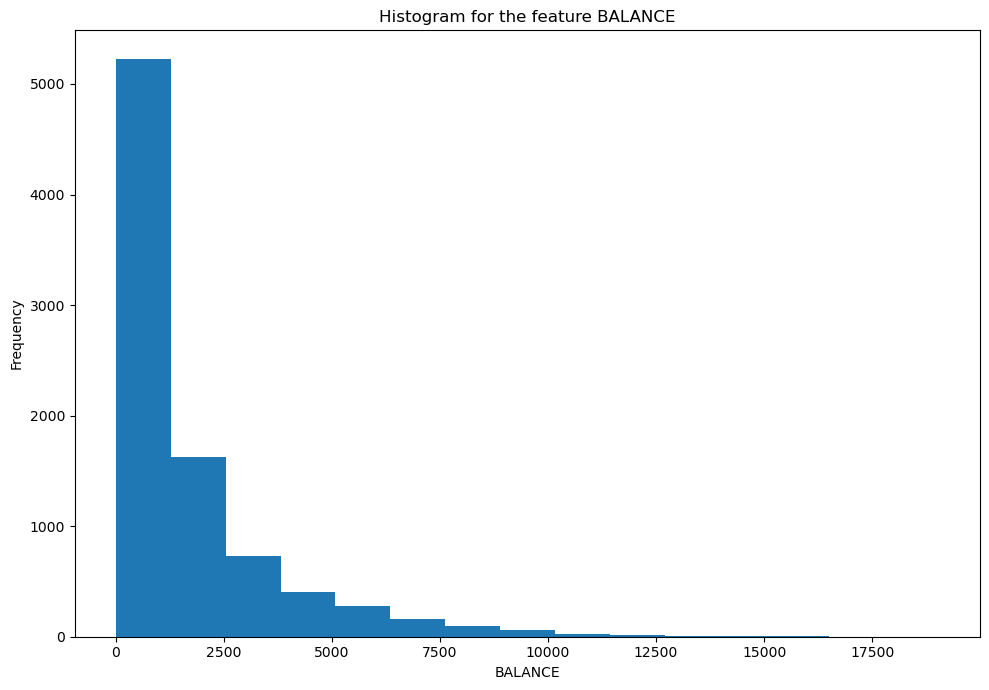

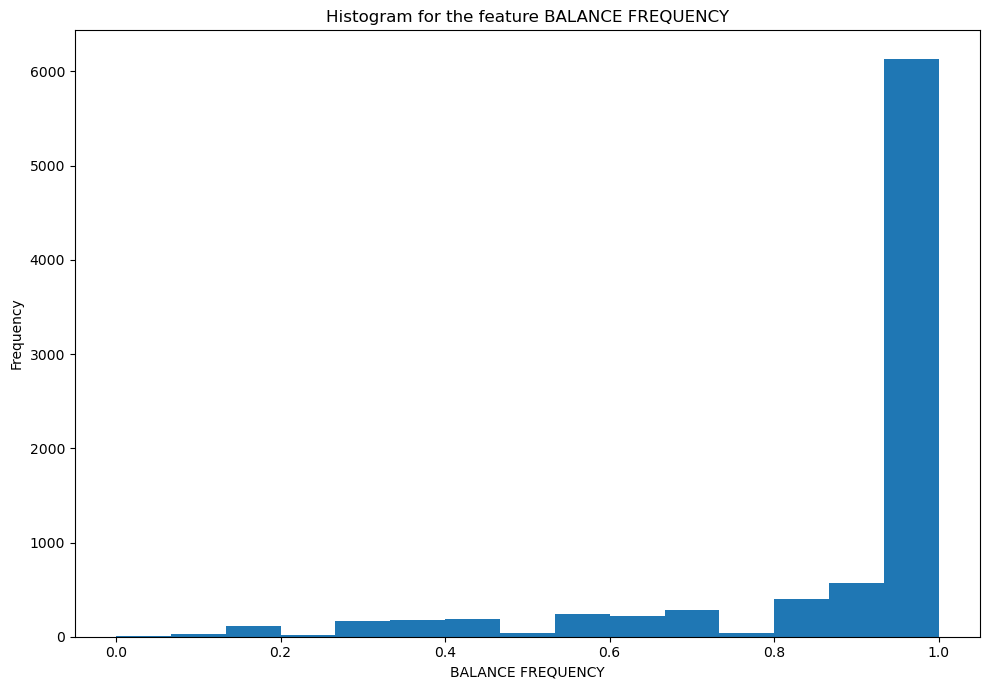

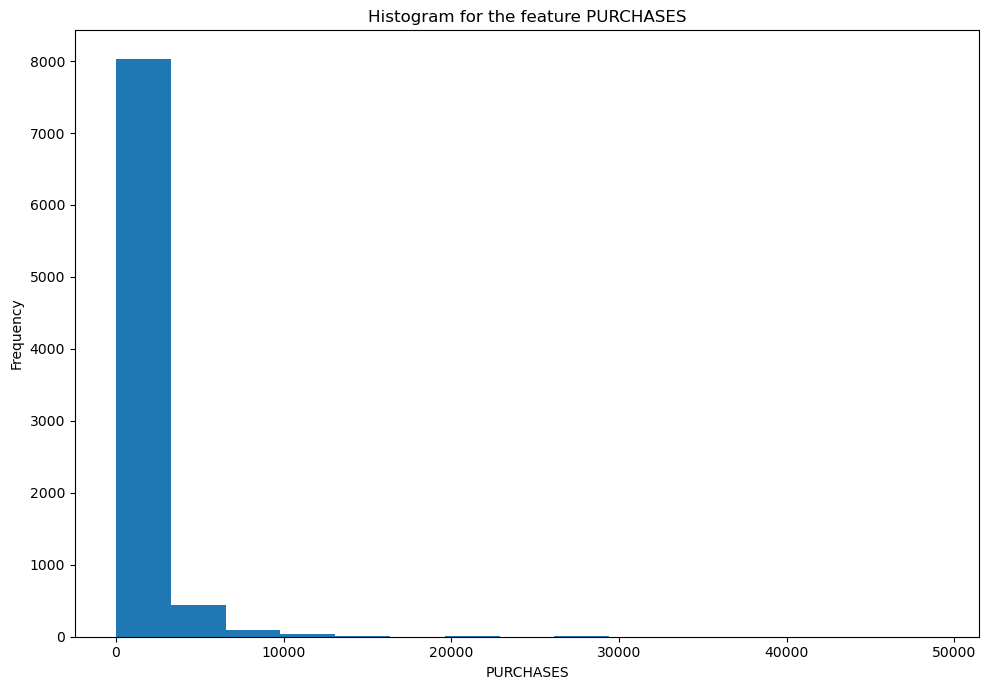

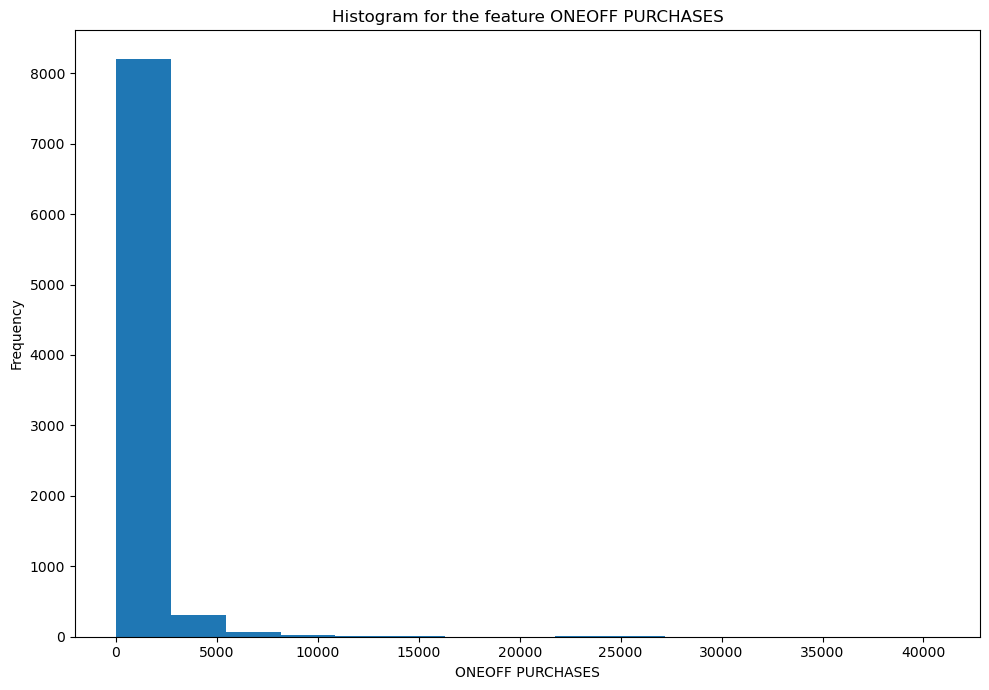

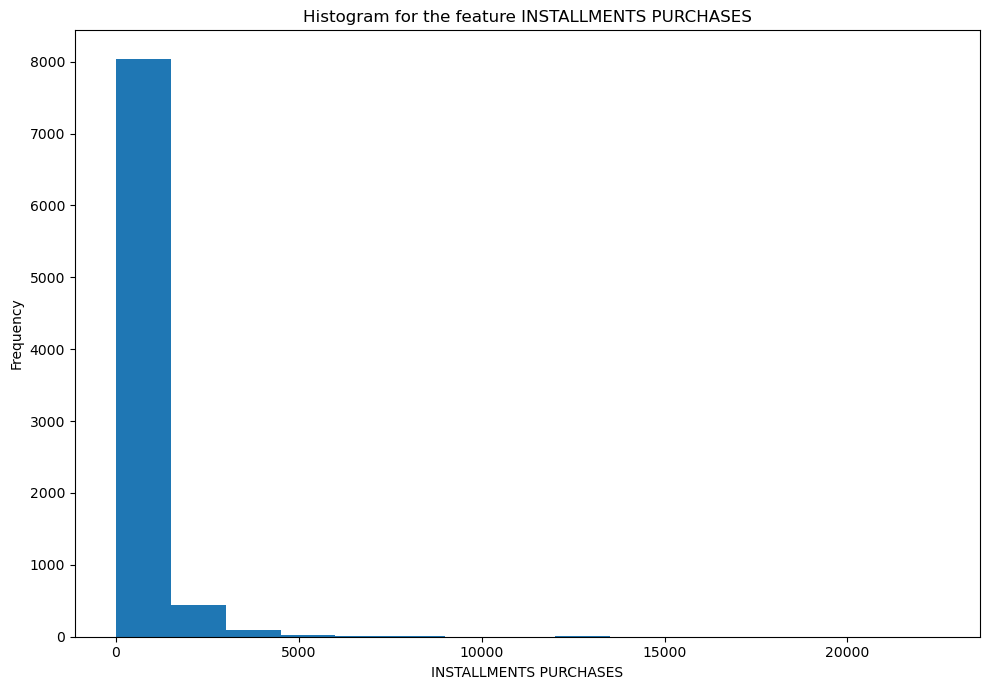

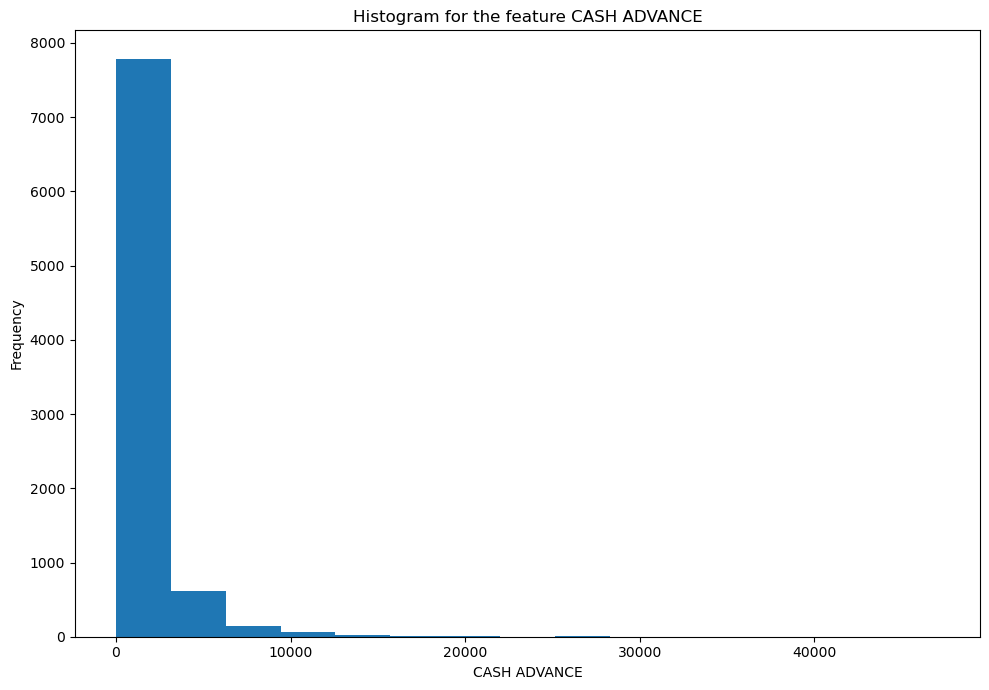

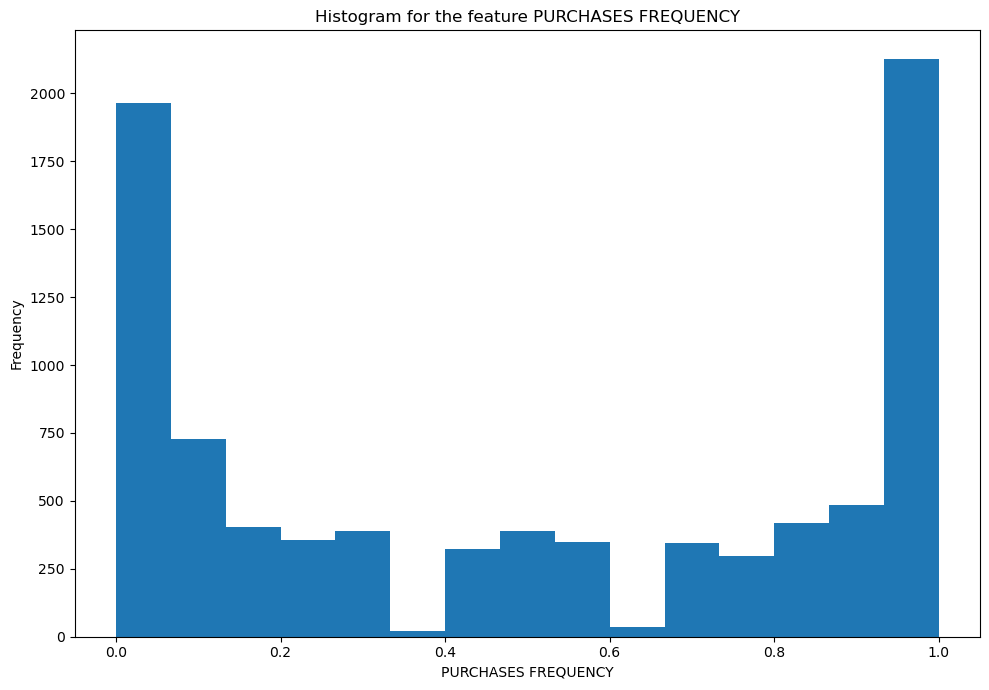

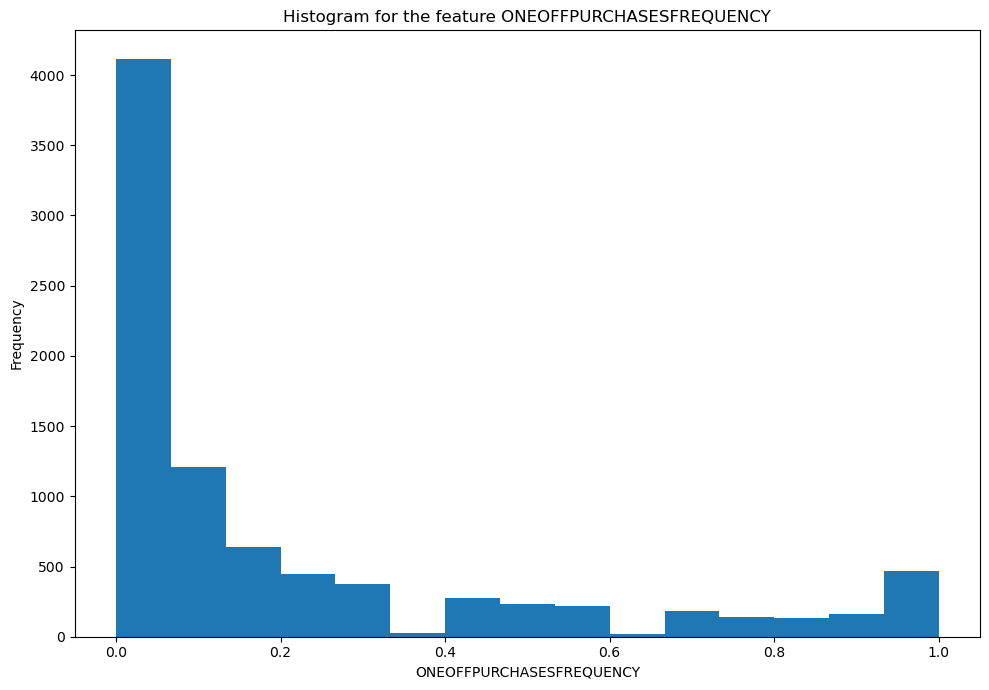

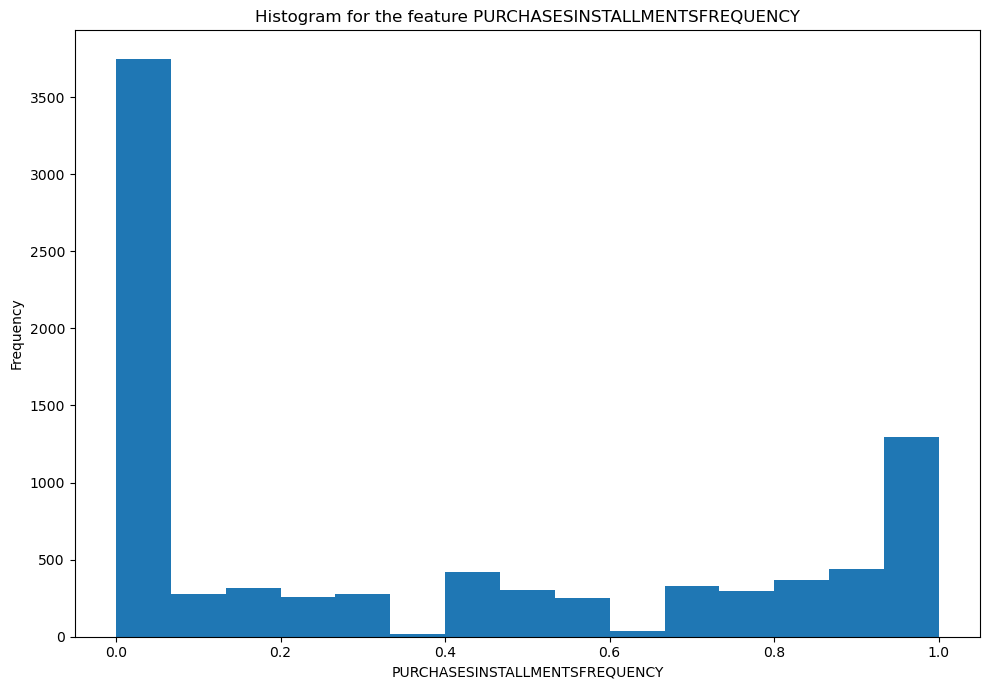

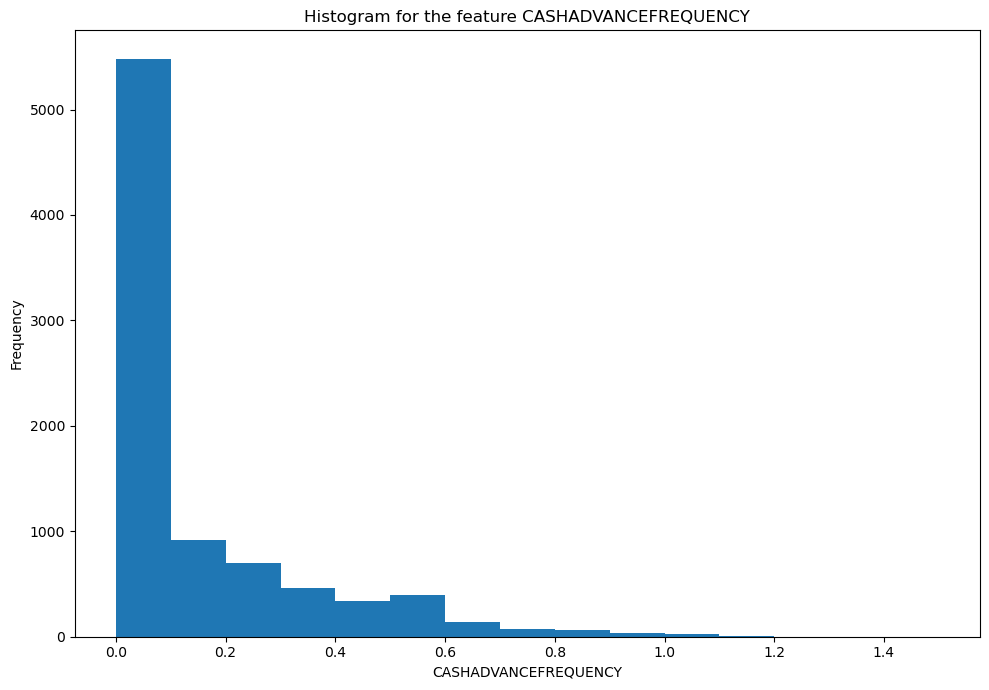

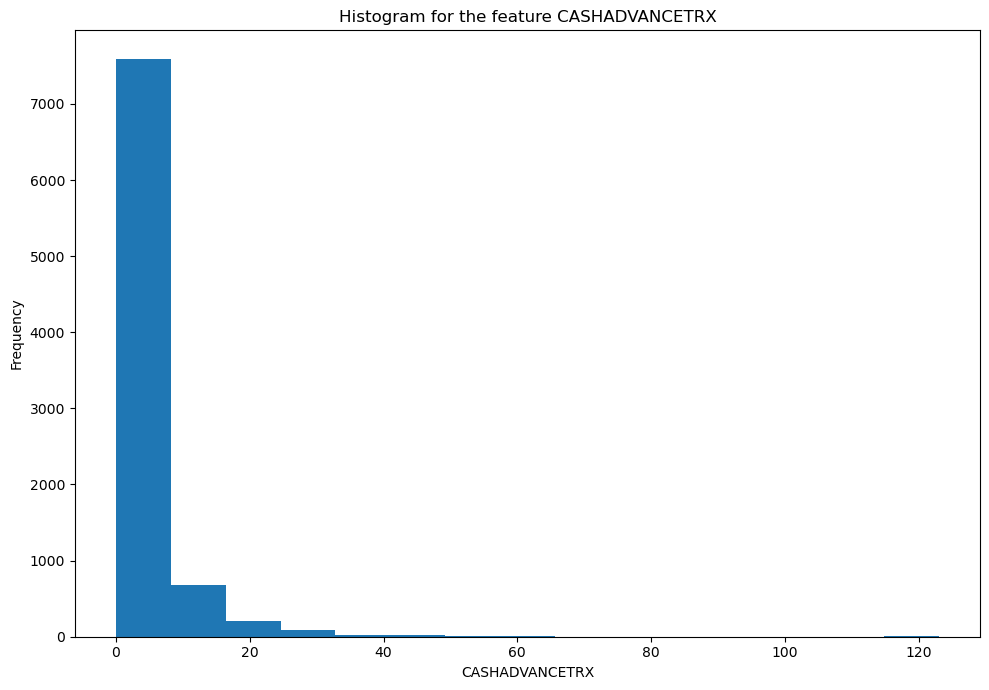

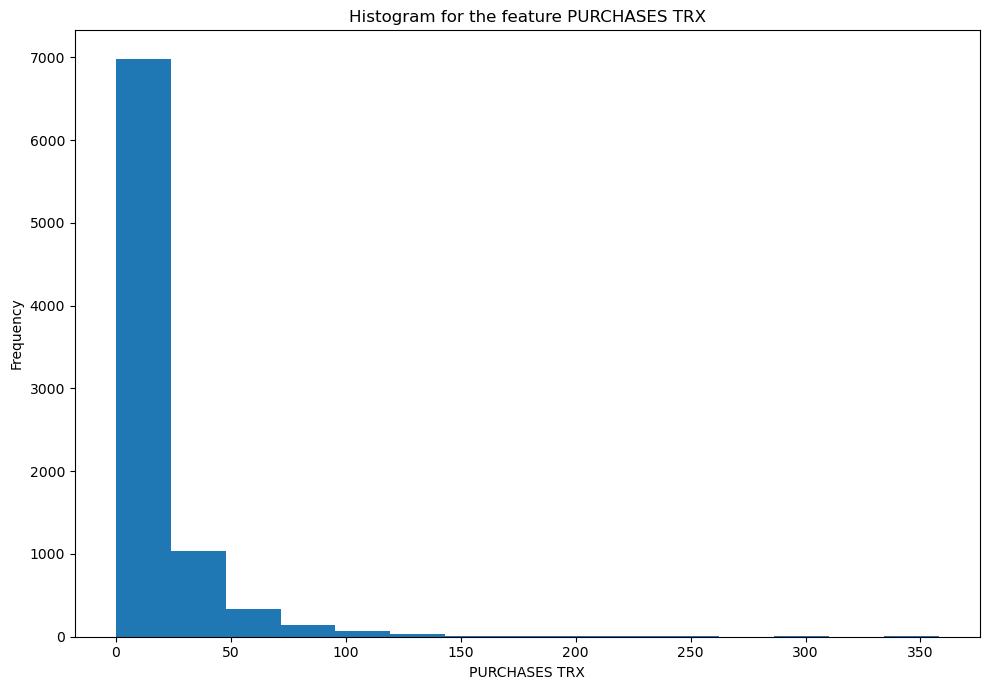

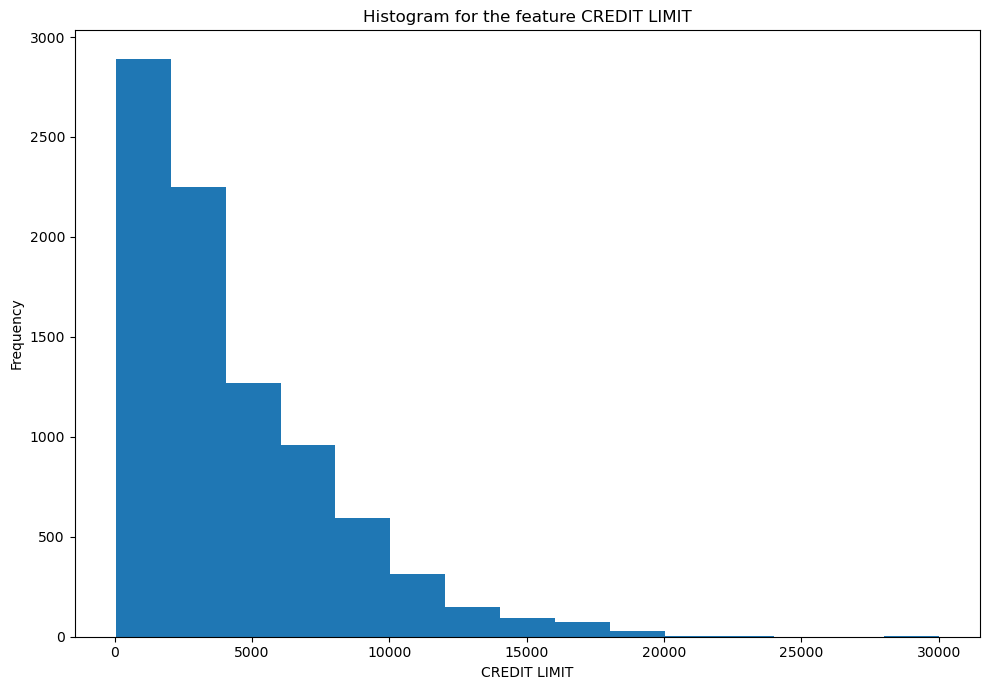

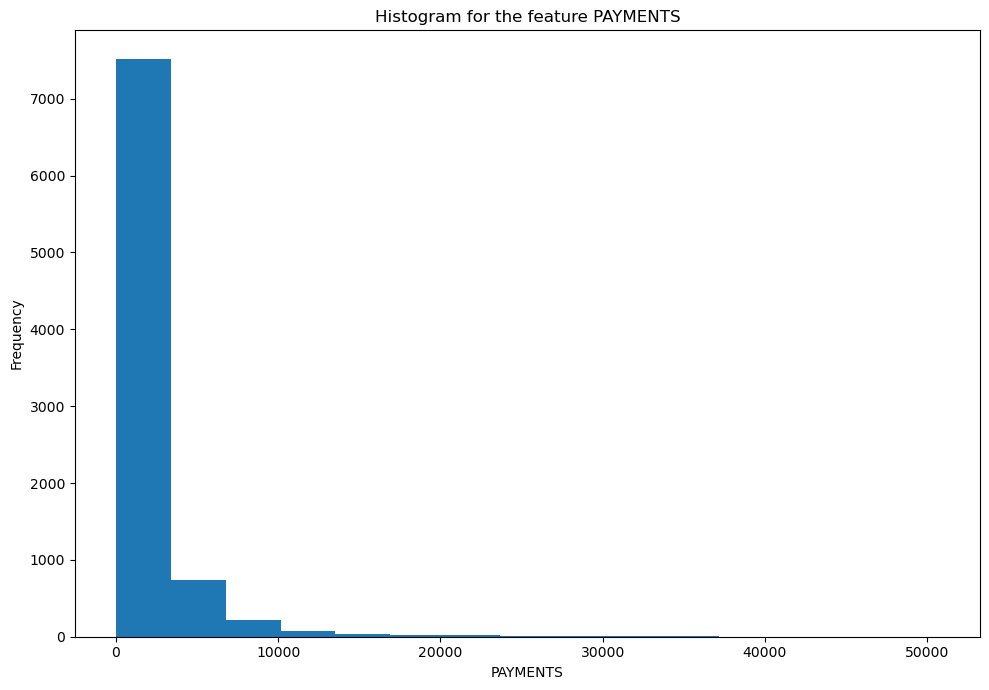

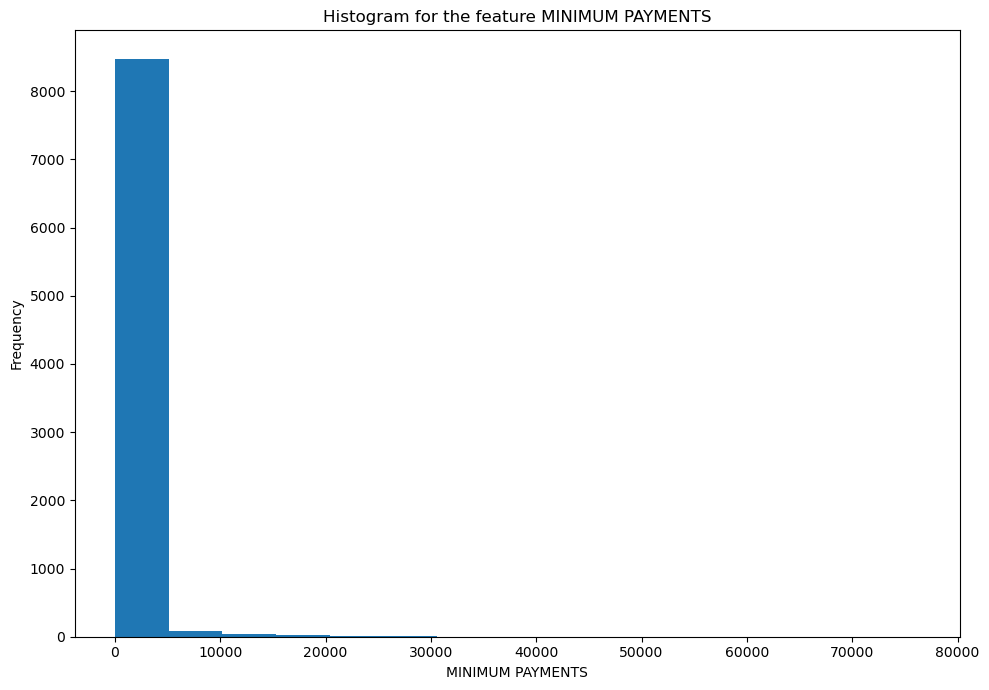

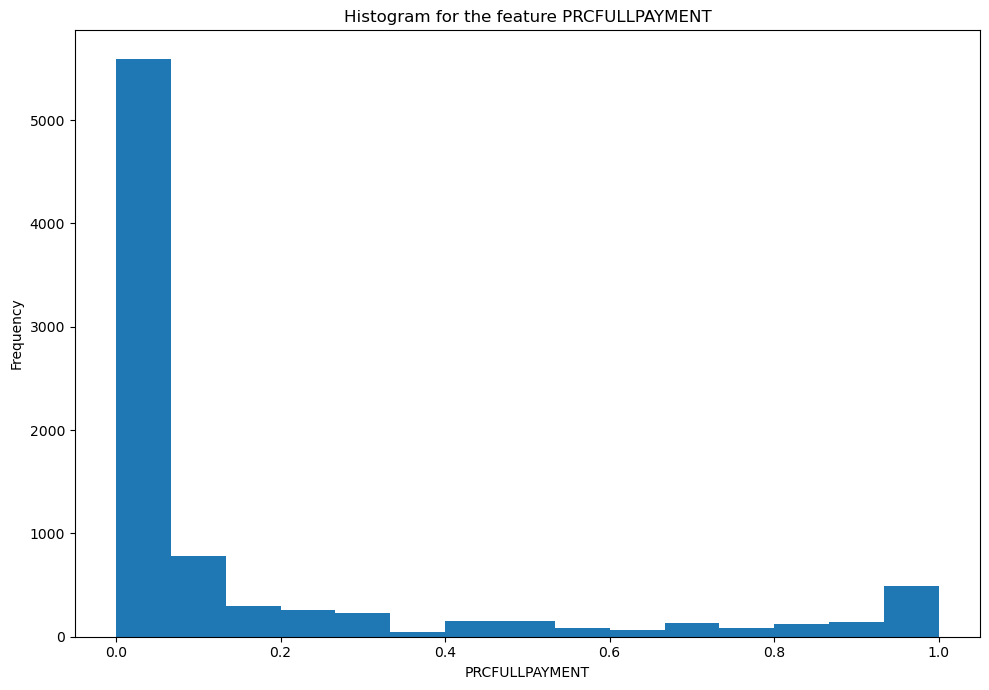

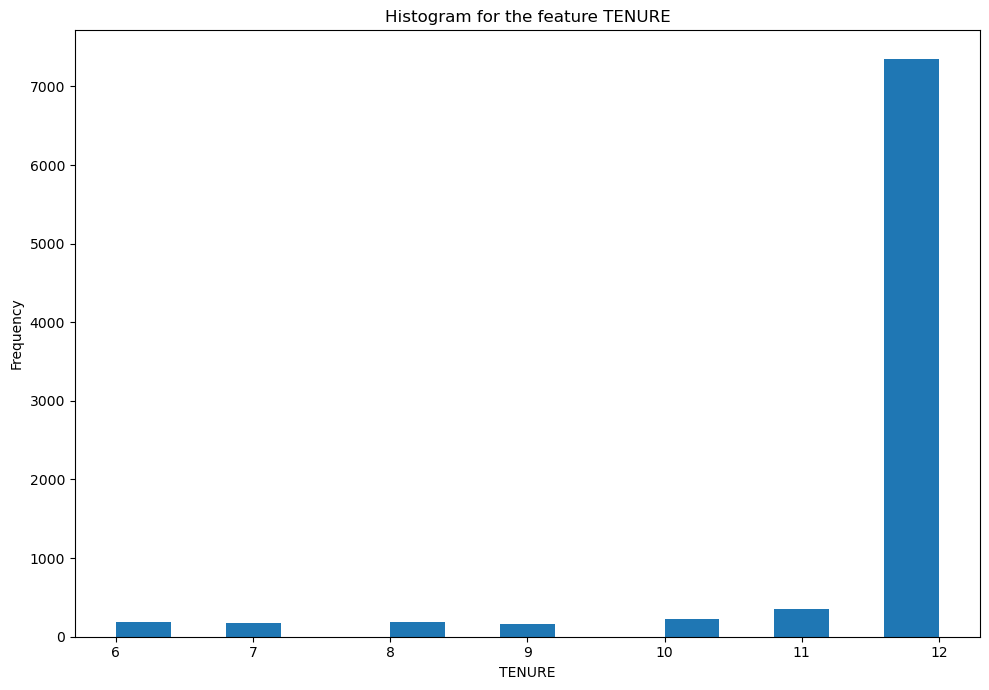

Skewness of each feature:
Feature 1 : BALANCE, skewness = 2.3738417590847476
Feature 2 : BALANCE FREQUENCY, skewness = -2.0837994635677406
Feature 3 : PURCHASES, skewness = 8.054389717672292
Feature 4 : ONEOFF PURCHASES, skewness = 9.93405008963337
Feature 5 : INSTALLMENTS PURCHASES, skewness = 7.214879867060874
Feature 6 : CASH ADVANCE, skewness = 5.138735812674824
Feature 7 : PURCHASES FREQUENCY, skewness = 0.033035477037494126
Feature 8 : ONEOFFPURCHASESFREQUENCY, skewness = 1.5039729481220758
Feature 9 : PURCHASESINSTALLMENTSFREQUENCY, skewness = 0.48766823168279305
Feature 10 : CASHADVANCEFREQUENCY, skewness = 1.7956030886793866
Feature 11 : CASHADVANCETRX, skewness = 5.672341373906909
Feature 12 : PURCHASES TRX, skewness = 4.5776231797273415
Feature 13 : CREDIT LIMIT, skewness = 1.5067572718165825
Feature 14 : PAYMENTS, skewness = 5.87202843879492
Feature 15 : MINIMUM PAYMENTS, skewness = 13.619826915850016
Feature 16 : PRCFULLPAYMENT, skewness = 1.88569952748643
Feature 17 : TEN

In [146]:
#no_of_records = 100
no_of_records = len(df)
input_records = []

# populating the feature attributes as a list
for i in range(no_of_records):
    input_record = []
    for j in range(0, 18):
        input_record.append(df.values[i][j])
    input_records.append(input_record)
     
# Filtering out all the rows with one or more empty cells
input_records_with_complete_data = []

for i in range(0, no_of_records):
    is_record_valid = True
    for j in range(0, 18):
        if pd.isnull(input_records[i][j]):
            is_record_valid = False
            break
    
    if is_record_valid == True:
        input_records_with_complete_data.append(input_records[i])
        
final_no_of_records = len(input_records_with_complete_data)
feature_data = []

# Fetching the data of each feature so that the histogram can be plotted
for j in range(0, 18):
    column_data = []
    for i in range(0, final_no_of_records):
        column_data.append(input_records_with_complete_data[i][j])
    feature_data.append(column_data)

        
feature = []
feature.append("CUST ID")
feature.append("BALANCE")
feature.append("BALANCE FREQUENCY")
feature.append("PURCHASES")
feature.append("ONEOFF PURCHASES")
feature.append("INSTALLMENTS PURCHASES")
feature.append("CASH ADVANCE")
feature.append("PURCHASES FREQUENCY")
feature.append("ONEOFFPURCHASESFREQUENCY")
feature.append("PURCHASESINSTALLMENTSFREQUENCY")
feature.append("CASHADVANCEFREQUENCY")
feature.append("CASHADVANCETRX")
feature.append("PURCHASES TRX")
feature.append("CREDIT LIMIT")
feature.append("PAYMENTS")
feature.append("MINIMUM PAYMENTS")
feature.append("PRCFULLPAYMENT")
feature.append("TENURE")

# plotting histogram for each feature
for i in range(1, 18):
    figure, ax = plot_graph.subplots(1, 1, figsize =(10, 7), tight_layout=True)
    ax.hist(feature_data[i], bins=15)
    plot_graph.xlabel(feature[i])
    plot_graph.ylabel("Frequency")
    plot_graph.title(f"Histogram for the feature {feature[i]}")
    plot_graph.show()

# calculating the skewness of each feature
print("Skewness of each feature:")
for i in range(1, 18):
    print(f"Feature {i} : {feature[i]}, skewness = {skew(feature_data[i])}")


### Discussion regarding variables and resultant histograms:

Most of the features' histograms are highly skewed (ie) the distribution of data of these features are highly skewed. 
<br>
I calculated the skewness for each feature using skew() function.
<br>
I have set a threshold of 2, and I will be picking up features (for part D) whose absolute value of skewness is less than threshold:
| skew(feature_data[i]) | <= threshold.

Following are some features for which there is non-skewed distributed of data across all the intervals (The ones with absolute skewness value lesser than the threshold):<br>
PURCHASES_FREQUENCY<br>
ONEOFF_PURCHASES_FREQUENCY<br>
PURCHASES_INSTALLMENTS_FREQUENCY<br>
CASH_ADVANCE_FREQUENCY<br>
CREDIT_LIMIT<br>
PRC_FULL_PAYMENT<br>
<br>
Following are features which are highly skewed to the left (skewness is highly positive):<br>
PURCHASES<br>
ONEOFF_PURCHASES<br>
INSTALLMENTS_PURCHASES<br>
CASH_ADVANCE<br>
CASH_ADVANCE_TRX<br>
MINIMUM_PAYMENTS<br>

<br>
Following are features which are highly skewed to the right (skewness value is highly negative):<br>
BALANCE_FREQUENCY<br>
TENURE

### B: Data exploration

In this section, we would do the following:

1) Compute the Pearson's correlation value between all pairs of variables
2) Build a matrix out of the correlations between the given variables (17 x 17 matrix)
3) Visualize the resulting matrix with a heatmap

Pearson correlation matrix heatmap :


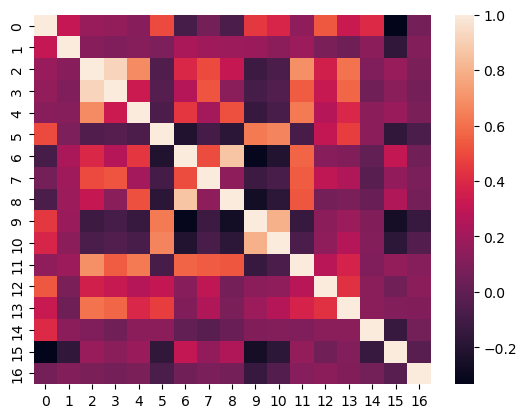

Indices of the features (with respect to the heatmap):
feature[0] = BALANCE
feature[1] = BALANCE FREQUENCY
feature[2] = PURCHASES
feature[3] = ONEOFF PURCHASES
feature[4] = INSTALLMENTS PURCHASES
feature[5] = CASH ADVANCE
feature[6] = PURCHASES FREQUENCY
feature[7] = ONEOFFPURCHASESFREQUENCY
feature[8] = PURCHASESINSTALLMENTSFREQUENCY
feature[9] = CASHADVANCEFREQUENCY
feature[10] = CASHADVANCETRX
feature[11] = PURCHASES TRX
feature[12] = CREDIT LIMIT
feature[13] = PAYMENTS
feature[14] = MINIMUM PAYMENTS
feature[15] = PRCFULLPAYMENT
feature[16] = TENURE


In [147]:
# 2D matrix for constructing pearson correlation matrix
pearson_correlation_matrix = []

for i in range(1, 18):
    correlation_list = []
    for j in range(1, 18):
        pearson_coeff, _var = pearsonr(feature_data[i], feature_data[j])
        correlation_list.append(pearson_coeff)
    
    pearson_correlation_matrix.append(correlation_list)
    
print("Pearson correlation matrix heatmap :")
plot_heatmap.heatmap(pearson_correlation_matrix)
plot_graph.show()

print(f"Indices of the features (with respect to the heatmap):")
print(f"feature[0] = BALANCE")
print(f"feature[1] = BALANCE FREQUENCY")
print(f"feature[2] = PURCHASES")
print(f"feature[3] = ONEOFF PURCHASES")
print(f"feature[4] = INSTALLMENTS PURCHASES")
print(f"feature[5] = CASH ADVANCE")
print(f"feature[6] = PURCHASES FREQUENCY")
print(f"feature[7] = ONEOFFPURCHASESFREQUENCY")
print(f"feature[8] = PURCHASESINSTALLMENTSFREQUENCY")
print(f"feature[9] = CASHADVANCEFREQUENCY")
print(f"feature[10] = CASHADVANCETRX")
print(f"feature[11] = PURCHASES TRX")
print(f"feature[12] = CREDIT LIMIT")
print(f"feature[13] = PAYMENTS")
print(f"feature[14] = MINIMUM PAYMENTS")
print(f"feature[15] = PRCFULLPAYMENT")
print(f"feature[16] = TENURE")


### Association between the variables (features)

Based on the above pearson correlation heatmap, we can conclude the following:<br>
<br>
Following are some pairs of features with high positive correlation (pearson correlation > 0 ):<br>
(2,3) - PURCHASES, ONEOFF PURCHASES<br>
(6,8) - PURCHASES FREQUENCY, PURCHASESINSTALLMENTSFREQUENCY<br>
(9, 10) - CASHADVANCEFREQUENCY, CASHADVANCETRX<br>
<br>
<br>
Following are some pairs of features with high negative correlation (pearson correlation < 0 ):<br>
(9,15) - CASHADVANCEFREQUENCY, PRCFULLPAYMENT<br>
(14,15) - MINIMUM PAYMENTS, PRCFULLPAYMENT<br>
(6,9) - PURCHASES FREQUENCY, CASHADVANCEFREQUENCY<br>
(5,6) - CASH ADVANCE, PURCHASES FREQUENCY<br>
<br>
<br>
Following are some pairs of features with no correlation (pearson correlation is almost 0):<br>
(1,13) - BALANCE FREQUENCY, PAYMENTS<br>
(3,14) - ONEOFF PURCHASES, MINIMUM PAYMENTS<br>
(12,15) - CREDIT LIMIT, PRCFULLPAYMENT<br>
(3,8) - ONEOFF PURCHASES, PURCHASESINSTALLMENTSFREQUENCY<br>
(8,12) - PURCHASESINSTALLMENTSFREQUENCY, CREDIT LIMIT<br>
(1,6) - BALANCE FREQUENCY, PURCHASES FREQUENCY<br>
(1,12) - BALANCE FREQUENCY, CREDIT LIMIT<br>
(0,7) - BALANCE, ONEOFFPURCHASESFREQUENCY


### C: K-means clustering


In this section, I have trained k-means clustering model with different values of k, and plot a histogram between k and the Inertia value (Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster). Using elbow method, I have deduced the optimal k. I have done feature normalization on the input data before using those to train the k-means clustering models.

Inertia value list:
[129540.0000000003, 106121.38766099395, 92458.17634183058, 81271.9393966902, 73908.66154814216, 67510.61858749719, 62759.487120029524, 58247.10526592044, 54951.60053245205, 52182.882793903875, 49989.73389394196, 48241.3671550836, 46616.08247573383, 45108.95918570482]


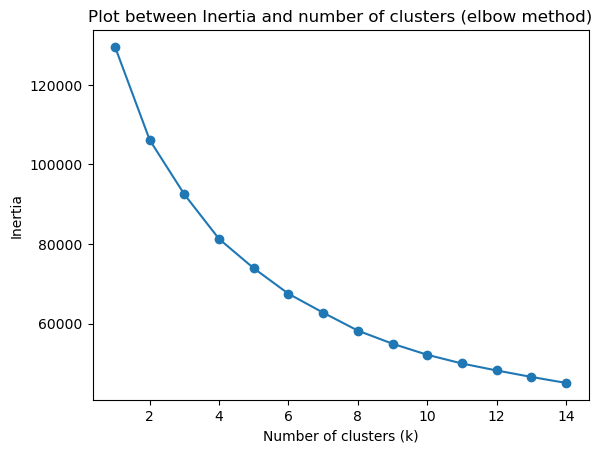

In [148]:
# for feature normalization
standardScaler = StandardScaler()

# getting the feature data for features from 2-16
input_data_for_k_means = []
inertia_list = []
k_indices = []

# fetching the required dataset and doing feature normalization on top of it
no_of_records = len(feature_data[0])

for i in range(no_of_records):
    input_record = []
    for j in range(2, 17):
        input_record.append(feature_data[j][i])

    input_data_for_k_means.append(input_record)
    
# feature normalization
input_data_for_k_means = standardScaler.fit_transform(input_data_for_k_means)
    
warnings.filterwarnings('ignore')

# build K-means model for different values of K, and keep track of the inertia for each K
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=42)
    kmeans_model.fit(input_data_for_k_means)
    inertia_list.append(kmeans_model.inertia_)
    k_indices.append(i)

print("Inertia value list:")
print(inertia_list)

# Plotting the graph between inertia and number of clusters to gauge the optimal value for k
plot_graph.plot(k_indices, inertia_list, marker='o')
plot_graph.title('Plot between Inertia and number of clusters (elbow method)')
plot_graph.xlabel('Number of clusters (k)')
plot_graph.ylabel('Inertia')
plot_graph.show()


### Finding the optimal K (no of clusters) using the elbow method

From the above inertia vs number of cluster graph, I am applying the elbow method to figure out the optimal k value. We can see that after k (no of clusters) = 6, the decrease in Inertia between consecutive values of K has reduced to a greater extent. Till k = 6, the decrease in Inertia between consecutive values of K was fairly high.
<br>
From the inertia value list, we can infer the following: <br>
K = 4 to k = 5 -> difference = 7363<br>
K = 5 to k = 6 -> difference = 6398<br>
K = 6 to k = 7 -> difference = 4751<br>
K = 7 to k = 8 -> difference = 4512<br>
K = 8 to k = 9 -> difference = 3296<br>
<br>
If you see, the inertia difference for (k = 5 -> 6) is much higher than the difference for (k = 6 -> 7) and the difference isn't drastic after that (k = 6 -> 7 and k = 7 -> 8)
<br>
<br>
So, I conclude that K = 6 is the optimal value for k-means cluster model with respect to the given dataset.

In the next section, we will use the optimal k (k = 6) to build the k-means clustering model and find out the following:

1) No of samples in each cluster
2) Centroid of each cluster
3) scatter of each cluster 

In [149]:
# optimal k (deduced in the previous section using elbow method)
optimal_k = 6

# building the k-means clustering model with the optimal K value (deduced in the previous section)
optimal_kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
optimal_kmeans_model.fit(input_data_for_k_means)

# calculating the no of nodes in each cluster
dataframe = pd.DataFrame() 
dataframe['kmean'] = optimal_kmeans_model.labels_

centroid_list = {}
number_of_nodes_in_each_cluster = {}
sum_of_feature_values_in_each_cluster = {}
distance_from_centroids = {}

# predicting the cluster of all the samples in the input dataset
class_values = optimal_kmeans_model.predict(input_data_for_k_means)

# calculating the number of samples in each cluster, and the feature value sum for each cluster
# using the feature value sum, we can find out the centroid of each cluster
for i in range(no_of_records):

    if class_values[i] in number_of_nodes_in_each_cluster:
        number_of_nodes_in_each_cluster[class_values[i]] += 1
    else:
        number_of_nodes_in_each_cluster[class_values[i]] = 1
    
    if class_values[i] not in sum_of_feature_values_in_each_cluster:
        sum_of_feature_values_in_each_cluster[class_values[i]] = [0.0] * 15
        
    for j in range(0, 15):
        sum_of_feature_values_in_each_cluster[class_values[i]][j] += input_data_for_k_means[i][j]


print("Number of samples in each cluster :")
for key in number_of_nodes_in_each_cluster:
    print(f"Cluster {key} : {number_of_nodes_in_each_cluster[key]}")

for key in sum_of_feature_values_in_each_cluster:
    cluster_index = key
    for j in range(0, 15):
        sum_of_feature_values_in_each_cluster[key][j] = sum_of_feature_values_in_each_cluster[key][j] / (1.0 * number_of_nodes_in_each_cluster[key])
    
    centroid_list[cluster_index] = sum_of_feature_values_in_each_cluster[key]

print()
print()
print("Centroids of each cluster : ")
for key in centroid_list:
    print(f"Cluster {key} : {centroid_list[key]}")
    print()

# calculating the scatter of each cluster (i.e., average distance of each sample of the cluster to the cluster centroid)
for i in range(no_of_records):
    distance_from_centroid = 0.0
    class_value = class_values[i]
    for j in range(0, 15):
        distance_from_centroid += np.power(input_data_for_k_means[i][j] - centroid_list[class_value][j], 2)
    distance_from_centroid = np.power(distance_from_centroid, 0.5)

    if class_value in distance_from_centroids:
        distance_from_centroids[class_value] += distance_from_centroid
    else:
        distance_from_centroids[class_value] = distance_from_centroid

# calculating the average distance of nodes in a cluster from the respective centroid
for key in distance_from_centroids:
    distance_from_centroids[key] = distance_from_centroids[key] / (1.0 * number_of_nodes_in_each_cluster[key])

print()
print("Scatter of each cluster : ")
for key in distance_from_centroids:
    print(f"Cluster {key} : {distance_from_centroids[key]}")
    
# association with variable 17 (PRC FULL PAYMENT) and 18 (TENURE)
record_count = len(input_records_with_complete_data)
average_prc_full_payment_for_each_cluster = {}
average_tenure_for_each_cluster = {}

for i in range(no_of_records):
    class_value = class_values[i]
    # for variable 17 (PRC FULL PAYMENT)
    if class_value in average_prc_full_payment_for_each_cluster:
        average_prc_full_payment_for_each_cluster[class_value] += input_records_with_complete_data[i][16]
    else:
        average_prc_full_payment_for_each_cluster[class_value] = input_records_with_complete_data[i][16]
    # for variable 18 (TENURE)
    if class_value in average_tenure_for_each_cluster:
        average_tenure_for_each_cluster[class_value] += input_records_with_complete_data[i][17]
    else:
        average_tenure_for_each_cluster[class_value] = input_records_with_complete_data[i][17]
    
print()
print("Association with variable 17 (PRC FULL PAYMENT) and 18 (TENURE)")
for key in average_prc_full_payment_for_each_cluster:
    average_prc_full_payment_for_each_cluster[key] = average_prc_full_payment_for_each_cluster[key] / (1.0 * number_of_nodes_in_each_cluster[key])
    average_tenure_for_each_cluster[key] = average_tenure_for_each_cluster[key] / (1.0 * number_of_nodes_in_each_cluster[key])
    print(f"Cluster {key}")
    print(f"Average value of PRC_FULL_PAYMENT = {average_prc_full_payment_for_each_cluster[key]}")
    print(f"Average value of TENURE = {average_tenure_for_each_cluster[key]}")
    print()

Number of samples in each cluster :
Cluster 0 : 3035
Cluster 4 : 886
Cluster 1 : 1275
Cluster 2 : 2211
Cluster 5 : 1148
Cluster 3 : 81


Centroids of each cluster : 
Cluster 0 : [0.35263042323215504, -0.35163493342459406, -0.22992843038676636, -0.40873332104665694, -0.08779301829852565, -0.8353688920269429, -0.34797345963058285, -0.7731923741441342, 0.10495147163568518, -0.051993995560451645, -0.4767950035106724, -0.302398359577261, -0.2737450511613796, -0.008772341163806659, -0.4661713102028592]

Cluster 4 : [0.30380196038039636, -0.2284601481045434, -0.16088975018682763, -0.2445434544652566, 2.0147516346421024, -0.5062577698142714, -0.19857599880063195, -0.4574885979642873, 2.026240388400551, 2.0040196082851973, -0.277312045963099, 0.8268245481627512, 0.8024811152102553, 0.40645284143831023, -0.37110783105785516]

Cluster 1 : [0.39552892059904726, 0.9231964914496612, 0.8858436967578993, 0.5546963310345426, -0.2997156282284947, 1.0705391511125157, 1.8550226298279147, 0.506952108848037

### Discussion on the findings

So, we used different values of K to train the k-means clustering model, and used elbow method to calculate the optimal k from the Inertia vs number of clusters graph.
<br>
The sample distribution across the clusters are as follows:<br>
Cluster 0 : 3035<br>
Cluster 4 : 886<br>
Cluster 1 : 1275<br>
Cluster 2 : 2211<br>
Cluster 5 : 1148<br>
Cluster 3 : 81<br>
<br>
And the scatter of each cluster is as follows:<br>
Cluster 0 : 1.618608418322972<br>
Cluster 4 : 3.470830413677313<br>
Cluster 1 : 3.146469237547969<br>
Cluster 2 : 2.0403014106586914<br>
Cluster 5 : 2.0963599182993593<br>
Cluster 3 : 9.293272890550835<br>
<br>
With respect to association with variable 17 (PRC FULL PAYMENT) and 18 (TENURE), I calculated the average value of variable 17 and 18 for each cluster and the results are as follows:
<br>
Cluster 0:<br>
Average value of PRC_FULL_PAYMENT = 0.021198623393739804<br>
Average value of TENURE = 11.518616144975288<br>

Cluster 4:<br>
Average value of PRC_FULL_PAYMENT = 0.04936153611738154<br>
Average value of TENURE = 11.331828442437923<br>

Cluster 1:<br>
Average value of PRC_FULL_PAYMENT = 0.2949904235294116<br>
Average value of TENURE = 11.831372549019608<br>

Cluster 2:<br>
Average value of PRC_FULL_PAYMENT = 0.24186819086386258<br>
Average value of TENURE = 11.504296698326549<br>

Cluster 5:<br>
Average value of PRC_FULL_PAYMENT = 0.2824575548780487<br>
Average value of TENURE = 11.430313588850174<br>

Cluster 3:<br>
Average value of PRC_FULL_PAYMENT = 0.4015966419753087<br>
Average value of TENURE = 11.962962962962964
<br>
<br>
With respect to PRC_FULL_PAYMENT, we can observe that the average values across the clusters are within range of [0, 0.4]. So, we can observe the skewness like we observed in the histogram for PRC_FULL_PAYMENT (part A) (skewed to the left side).
<br>
<br>
With respect to TENURE, we can observe that the average values across the clusters are within range of [11.3, 12]. So, we can observe the skewness like we observed in the histogram for TENURE (part A) (skewed to the right side).

### D : K-means clustering


In this section, we will use a different set of features to build the k-means clustering model and find the optimal K. We will first choose the features which have a non-skewed data distribution across intervals (refer part A), which are as follows:<br>
PURCHASES FREQUENCY<br>
ONEOFFPURCHASESFREQUENCY<br>
CASHADVANCEFREQUENCY<br>
CREDIT LIMIT<br>
PRCFULLPAYMENT<br>
PURCHASESINSTALLMENTSFREQUENCY<br>
<br>
Also, following are some feature combinations which are not correlated, implying a very low pearson correlation value (refer part B):<br>
(1,13) - BALANCE FREQUENCY, PAYMENTS<br>
(3,14) - ONEOFF PURCHASES, MINIMUM PAYMENTS<br>
(12,15) - CREDIT LIMIT, PRCFULLPAYMENT<br>
(3,8) - ONEOFF PURCHASES, PURCHASESINSTALLMENTSFREQUENCY<br>
(8,12) - PURCHASESINSTALLMENTSFREQUENCY, CREDIT LIMIT<br>
(1,6) - BALANCE FREQUENCY, PURCHASES FREQUENCY<br>
(1,12) - BALANCE FREQUENCY, CREDIT LIMIT<br>
(0,7) - BALANCE, ONEOFFPURCHASESFREQUENCY<br>
<br>

With the respect to the above, I will consider the following features which are non-skewed:
PURCHASES FREQUENCY<br>
ONEOFFPURCHASESFREQUENCY<br>
CASHADVANCEFREQUENCY<br>
CREDIT LIMIT<br>
PRCFULLPAYMENT<br>
<br>
And I will pick some features (from part B) which have no correlation with one of the above 5 selected features:<br>
BALANCE FREQUENCY ( as it is not correlated with PURCHASES FREQUENCY)<br>
BALANCE (as it is not correlated with ONEOFFPURCHASESFREQUENCY)<br>
<br>

In conclusion, I will use the below list of features for this section:<br>
PURCHASES FREQUENCY<br>
ONEOFFPURCHASESFREQUENCY<br>
CASHADVANCEFREQUENCY<br>
CREDIT LIMIT<br>
PRCFULLPAYMENT<br>
BALANCE FREQUENCY<br>
BALANCE



In this section, we will calculate the optimal K just like how we did in part C using the above set of features.

Inertia value list :
[60451.999999998836, 48841.56113118735, 39966.066056099466, 32934.98887921123, 28184.484000067558, 24878.421464210736, 22637.146885489754, 20712.2250500114, 19523.945622219693, 18490.237022351575, 17395.434798507526, 16588.66459230583, 15818.631845449505, 15296.163901320902]


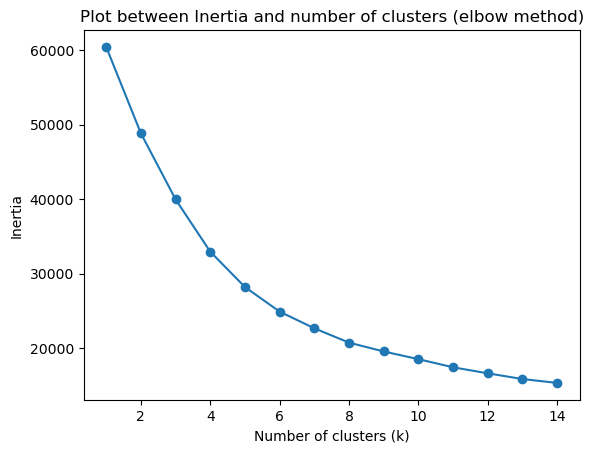

In [150]:
# the below list consist of the indices of the features which are considered (as mentioned in the above passage)
feature_indices = [7, 8, 10, 13, 16, 1, 2]
feature_count = len(feature_indices)

input_data_for_part_d = []
inertia_list_part_d = []
indices_list = []

# generating the input dataset for the model (using the features mentioned above)
for i in range(no_of_records):
    input_record = []
    for j in range(feature_count):
        input_record.append(input_records_with_complete_data[i][feature_indices[j]])
    input_data_for_part_d.append(input_record)

# feature normalization
input_data_for_part_d = standardScaler.fit_transform(input_data_for_part_d)
    
warnings.filterwarnings('ignore')

# build K-means model for different values of K, and keep track of the inertia for each K
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=42)
    kmeans_model.fit(input_data_for_part_d)
    inertia_list_part_d.append(kmeans_model.inertia_)
    indices_list.append(i)

print("Inertia value list :")
print(inertia_list_part_d)
# Plotting the graph between inertia and number of clusters to gauge the optimal value for k
plot_graph.plot(indices_list, inertia_list_part_d, marker='o')
plot_graph.title('Plot between Inertia and number of clusters (elbow method)')
plot_graph.xlabel('Number of clusters (k)')
plot_graph.ylabel('Inertia')
plot_graph.show()



Based on the Inertia vs number of clusters graph (in the previous section), let's apply the elbow method to figure out the optimal k value. We can see that after k (no of clusters) = 6, the reduction in Inertia between consecutive values of K has reduced to a greater extent. Till k = 6, the reduction in Inertia between consecutive values of K was fairly high.
<br>
From the inertia value list, we can infer the following: <br>
K = 5 to k = 6 -> difference = 3300<br>
K = 6 to k = 7 -> difference = 2241<br>
K = 7 to k = 8 -> difference = 1928<br>
<br>
If you see, the inertia difference for (k = 5 -> 6) is much higher than the difference for (k = 6 -> 7)
<br>
So, I conclude that K = 6 is the optimal value for k-means cluster model with respect to the given dataset.
<br>

In the next section, we will use the optimal k (found in the previous section) to build the k-means clustering model and find out the following:
1) No of samples in each cluster
2) Centroid of each cluster
3) scatter of each cluster 

In [151]:
# optimal k (deduced in the previous section using elbow method)
optimal_k = 6

# building the k-means clustering model with the optimal K value (deduced in the previous section)
optimal_kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
optimal_kmeans_model.fit(input_data_for_part_d)

no_of_records = len(input_data_for_part_d)

centroid_list = {}
number_of_nodes_in_each_cluster = {}
sum_of_feature_values_in_each_cluster = {}
distance_from_centroids = {}

# predicting the cluster of all the samples in the input dataset
class_values = optimal_kmeans_model.predict(input_data_for_part_d)

# calculating the number of samples in each cluster, and the feature value sum for each cluster
# using the feature value sum, we can find out the centroid of each cluster
for i in range(no_of_records):

    if class_values[i] in number_of_nodes_in_each_cluster:
        number_of_nodes_in_each_cluster[class_values[i]] += 1
    else:
        number_of_nodes_in_each_cluster[class_values[i]] = 1
    
    if class_values[i] not in sum_of_feature_values_in_each_cluster:
        sum_of_feature_values_in_each_cluster[class_values[i]] = [0.0] * feature_count
        
    for j in range(feature_count):
        sum_of_feature_values_in_each_cluster[class_values[i]][j] += input_data_for_part_d[i][j]

print("Number of samples in each cluster :")
for key in number_of_nodes_in_each_cluster:
    print(f"Cluster {key} : {number_of_nodes_in_each_cluster[key]}")

for key in sum_of_feature_values_in_each_cluster:
    cluster_index = key
    for j in range(feature_count):
        sum_of_feature_values_in_each_cluster[key][j] = sum_of_feature_values_in_each_cluster[key][j] / (1.0 * number_of_nodes_in_each_cluster[key])
    centroid_list[cluster_index] = sum_of_feature_values_in_each_cluster[key]

print()
print()
print("Centroids of each cluster : ")
for key in centroid_list:
    print(f"Cluster {key} : {centroid_list[key]}")
    print()

# calculating the scatter of each cluster (i.e., average distance of each sample of the cluster to the cluster centroid)
for i in range(no_of_records):
    distance_from_centroid = 0.0
    class_value = class_values[i]
    for j in range(feature_count):
        distance_from_centroid += np.power(input_data_for_part_d[i][j] - centroid_list[class_value][j], 2)
    distance_from_centroid = np.power(distance_from_centroid, 0.5)

    if class_value in distance_from_centroids:
        distance_from_centroids[class_value] += distance_from_centroid
    else:
        distance_from_centroids[class_value] = distance_from_centroid

# calculating the average distance of nodes in a cluster from the respective centroid
for key in distance_from_centroids:
    distance_from_centroids[key] = distance_from_centroids[key] / (1.0 * number_of_nodes_in_each_cluster[key])

print()
print("Scatter of each cluster : ")
for key in distance_from_centroids:
    print(f"Cluster {key} : {distance_from_centroids[key]}")
    

# association with variable 17 (PRC FULL PAYMENT) and 18 (TENURE)
record_count = len(input_records_with_complete_data)
average_prc_full_payment_for_each_cluster = {}
average_tenure_for_each_cluster = {}

for i in range(no_of_records):
    class_value = class_values[i]
    # for variable 17 (PRC FULL PAYMENT)
    if class_value in average_prc_full_payment_for_each_cluster:
        average_prc_full_payment_for_each_cluster[class_value] += input_records_with_complete_data[i][16]
    else:
        average_prc_full_payment_for_each_cluster[class_value] = input_records_with_complete_data[i][16]
    # for variable 18 (TENURE)
    if class_value in average_tenure_for_each_cluster:
        average_tenure_for_each_cluster[class_value] += input_records_with_complete_data[i][17]
    else:
        average_tenure_for_each_cluster[class_value] = input_records_with_complete_data[i][17]
    
print()
print("Association with variable 17 (PRC FULL PAYMENT) and 18 (TENURE)")
for key in average_prc_full_payment_for_each_cluster:
    average_prc_full_payment_for_each_cluster[key] = average_prc_full_payment_for_each_cluster[key] / (1.0 * number_of_nodes_in_each_cluster[key])
    average_tenure_for_each_cluster[key] = average_tenure_for_each_cluster[key] / (1.0 * number_of_nodes_in_each_cluster[key])
    print(f"Cluster {key}")
    print(f"Average value of PRC_FULL_PAYMENT = {average_prc_full_payment_for_each_cluster[key]}")
    print(f"Average value of TENURE = {average_tenure_for_each_cluster[key]}")
    print()

Number of samples in each cluster :
Cluster 1 : 2478
Cluster 0 : 1045
Cluster 5 : 2069
Cluster 2 : 977
Cluster 4 : 1137
Cluster 3 : 930


Centroids of each cluster : 
Cluster 1 : [-1.0171858249439751, -0.5026175533150395, 0.4159731147227586, -0.3839910670779973, -0.4521701932979643, -0.03432564049011171, 0.35054679889385626]

Cluster 0 : [1.009340175635085, 1.8534213501581098, -0.29463407403510383, 0.5073286573844507, -0.25811302504298533, 0.14509087592543818, 0.4188322008693544]

Cluster 5 : [0.7069489413921396, -0.2613868297843657, -0.4397035300228147, -0.4175037314878023, -0.30104690374023646, -0.31276309405287833, 0.36660089803184426]

Cluster 2 : [0.9151550810064033, 0.46666645513158106, -0.6251090423589599, 0.21052973367092076, 2.3131956407088157, -0.6659839768161926, 0.10142689863186503]

Cluster 4 : [-0.569304430651083, -0.4516937483087187, -0.45848572190180525, -0.20048767001832907, 0.18050738829533994, -0.6777975657693347, -2.2625562693272436]

Cluster 3 : [-0.261998651140600

### Discussion on the findings

With respect to part D, we selected 7 features and trained the k-means clustering model for various values of K, and deduced the optimal k as 6 (using elbow method). I removed highly skewed features (using the results of part A) and I kept features which are not correlated with each other (using the results of part B). The optimal k was 6 for part C as well. 
<br>
In this case (part D), the number of samples in each cluster are as follows:<br>
Cluster 1 : 2478<br>
Cluster 0 : 1045<br>
Cluster 5 : 2069<br>
Cluster 2 : 977<br>
Cluster 4 : 1137<br>
Cluster 3 : 930<br>
<br>
In this case (part D), the number of samples are fairly distributed across all the 6 clusters (which was not the case with part C).
<br>
In part C, the number of samples distributed across the clusters was a little skewed, as we can see below:
<br>
Number of samples in each cluster (part C):<br>
Cluster 0 : 3035<br>
Cluster 4 : 886<br>
Cluster 1 : 1275<br>
Cluster 2 : 2211<br>
Cluster 5 : 1148<br>
Cluster 3 : 81<br>
<br>
Similarly, the scatter of each cluster in this case is very much lesser ( max value = 2.25 ) when compared to that of part C (max value = 9.2), which we can observe below:
<br>
Scatter of each cluster (part D):<br>
Cluster 1 : 1.2487836374312447<br>
Cluster 0 : 1.6395626196563144<br>
Cluster 5 : 1.2603155081576614<br>
Cluster 2 : 1.9112048207930148<br>
Cluster 4 : 1.6865597998882906<br>
Cluster 3 : 2.2508399844849327<br>
<br>
Scatter of each cluster (part C):<br>
Cluster 0 : 1.618608418322972<br>
Cluster 4 : 3.470830413677313<br>
Cluster 1 : 3.146469237547969<br>
Cluster 2 : 2.0403014106586914<br>
Cluster 5 : 2.0963599182993593<br>
Cluster 3 : 9.293272890550835<br>
<br>
As we can observe, the average scatter across the clusters in part D (1.625) is lesser than that of part C (3.59).
<br>
<br>
With respect to association with variable 17 (PRC FULL PAYMENT) and 18 (TENURE), I calculated the average value of variable 17 and 18 for each cluster and the results are as follows: 
<br>
Cluster 1:<br>
Average value of PRC_FULL_PAYMENT = 0.025346506860371366<br>
Average value of TENURE = 11.422921711057304<br>

Cluster 0:<br>
Average value of PRC_FULL_PAYMENT = 0.08283667177033491<br>
Average value of TENURE = 11.758851674641148<br>

Cluster 5:<br>
Average value of PRC_FULL_PAYMENT = 0.0701173489608507<br>
Average value of TENURE = 11.57709038182697<br>

Cluster 2:<br>
Average value of PRC_FULL_PAYMENT = 0.8445965209825985<br>
Average value of TENURE = 11.508700102354146<br>

Cluster 4:<br>
Average value of PRC_FULL_PAYMENT = 0.21277961653474076<br>
Average value of TENURE = 11.467897977132806<br>

Cluster 3:<br>
Average value of PRC_FULL_PAYMENT = 0.015267868817204287<br>
Average value of TENURE = 11.59247311827957<br>
<br>
With respect to PRC_FULL_PAYMENT, we can observe that the average values across the clusters are within range of [0.01, 0.85]. So, we can deduce that the range of PRC_FULL_PAYMENT average value across the clusters is bigger when compared to that of part C.  
<br>
With respect to TENURE, we can observe that the average values across the clusters are within range of [11.4, 11.75]. So, we can deduce that the range of TENURE average value across the clusters is smaller when compared to that of part C.

### E: Gaussian mixture models

In this section, we would use GMMs to cluster the samples based on the subset of features we used in part D. 
The number of Gaussian mixtures can be approximately equal to the optimal num- ber of clusters.

We would be deducing the following:
1) mean vector and covariance matrix for each Gaussian (heatmap)
2) log-likelihood of each sample belonging to the GMM
3) Histogram of the resulting likelihood values


In [152]:
# Import the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot_graph
import warnings

from numpy import *
from typing import Tuple

from skimage.color import rgb2gray
from scipy.stats import pearsonr
import seaborn as plot_heatmap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


Gaussian mixture 1:

Mean vector of this mixture :
[-1.12214028 -0.53382506  0.42963025 -0.25269347 -0.31121778 -0.19814954
 -0.67732997]

Covariance matrix of this mixture (heatmap):


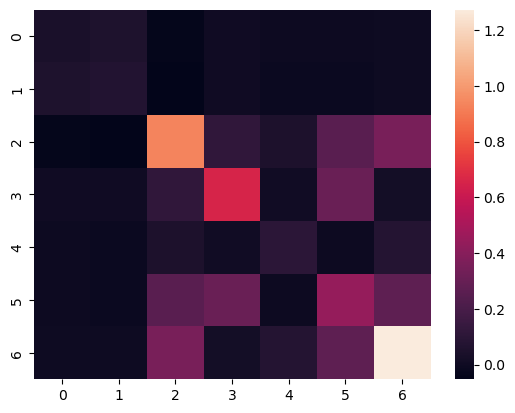



Gaussian mixture 2:

Mean vector of this mixture :
[ 0.69038178  0.67384124  0.16552649  0.1113457   0.01035091 -0.08282052
  0.50540465]

Covariance matrix of this mixture (heatmap):


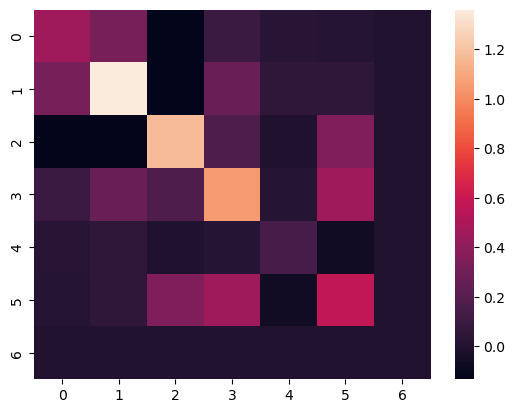



Gaussian mixture 3:

Mean vector of this mixture :
[ 0.48755444  0.04997264 -0.68195251 -0.0531752   1.07668559 -0.71092267
 -0.64307743]

Covariance matrix of this mixture (heatmap):


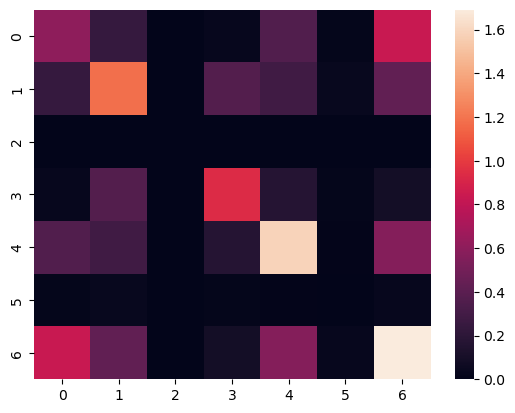



Gaussian mixture 4:

Mean vector of this mixture :
[ 0.6876719   0.92973574  0.47047459  0.59369679  0.56539195  0.06685035
 -0.03194983]

Covariance matrix of this mixture (heatmap):


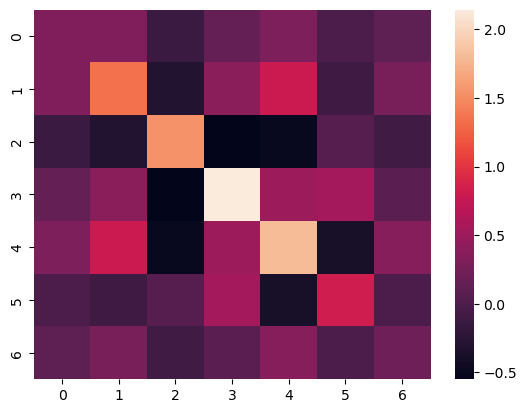



Gaussian mixture 5:

Mean vector of this mixture :
[-0.11014985 -0.02340063  0.20191117  0.05097027 -0.53772694  0.4423914
  0.50540465]

Covariance matrix of this mixture (heatmap):


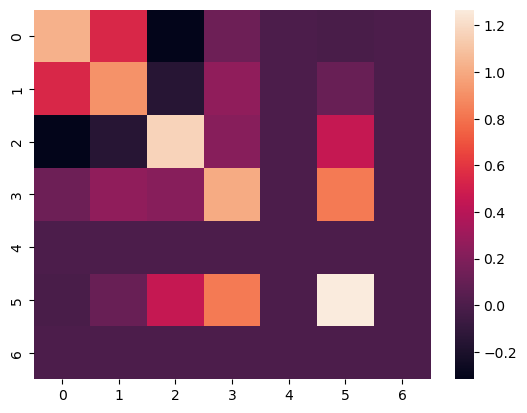



Gaussian mixture 6:

Mean vector of this mixture :
[-0.13305875 -0.45222807 -0.1102262  -0.38200138  0.46346204 -0.58598796
 -1.68402316]

Covariance matrix of this mixture (heatmap):


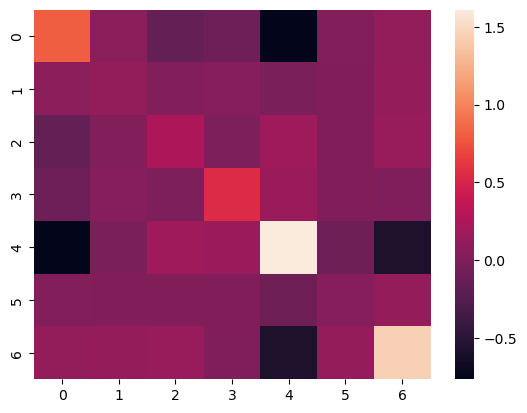

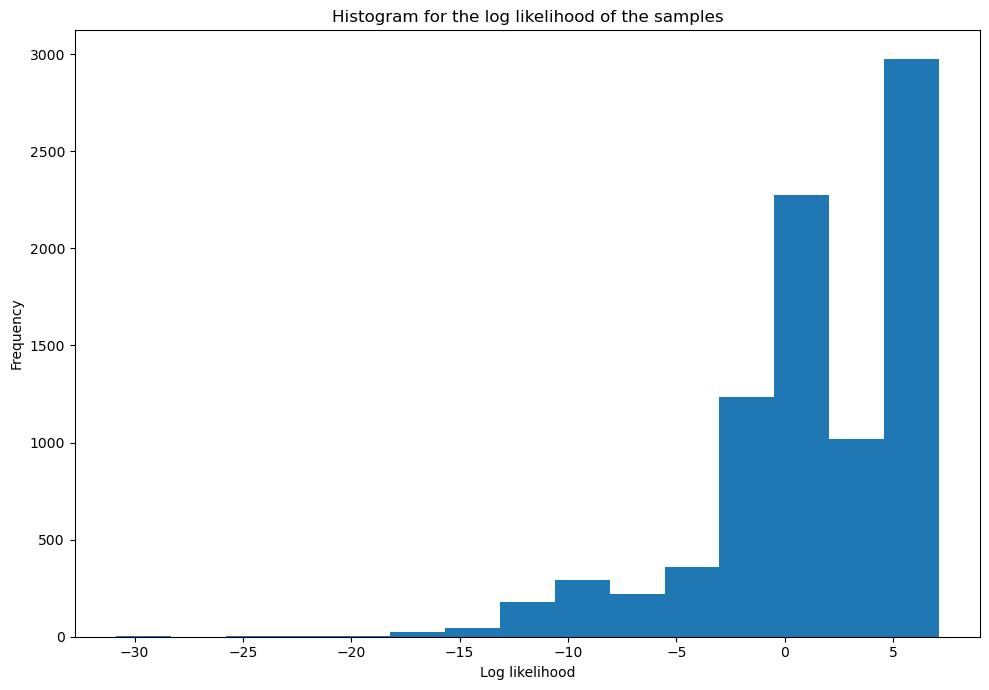

In [154]:
# intialize the number of gaussian mixtures which is equal to the optimal k deduced in part D.
no_of_mixtures = 6

# creating the GMM model
gmm_model = GaussianMixture(n_components=no_of_mixtures, random_state=42)

# fitting the model to the input data (part D)
gmm_model.fit(input_data_for_part_d)

log_likelihoods = gmm_model.score_samples(input_data_for_part_d)

# Deduce the mean vector and covariance matrix for each gaussian mixture
for i in range(no_of_mixtures):
    print(f"Gaussian mixture {i + 1}:")
    print()
    print("Mean vector of this mixture :")
    print(gmm_model.means_[i])
    print()
    print("Covariance matrix of this mixture (heatmap):")
    plot_heatmap.heatmap(gmm_model.covariances_[i])
    plot_graph.show()
    print()
    print()

# histogram with respect to log likelihoods
figure, ax = plot_graph.subplots(1, 1, figsize =(10, 7), tight_layout=True)
ax.hist(log_likelihoods, bins=15)
plot_graph.xlabel("Log likelihood")
plot_graph.ylabel("Frequency")
plot_graph.title(f"Histogram for the log likelihood of the samples")
plot_graph.show()


### Discussion on the findings

With respect to the mean vectors and covariance matrices for each mixture, these are my observations:
<br>
In Gaussian mixture 1 and 2, majority of the cells are zero, implying that majority of the feature pairs have no correlation, indicating the presence of outliers. The remaining feature pairs have positive values, implying positive correlation between these feature pairs, and very few feature pairs have high covariance (nearly 1) indicating high correlation. <br>

Gaussian mixture 3 is similar to that of 1 and 2, where majority of the cells are zero, implying that majority of the feature pairs have no correlation. The remaining feature pairs have positive correlation, and very few feature pairs (3-4) have high covariance (>= 1) indicating high correlation.<br>

In Gaussian mixture 4, majority of the cells are of positive value, implying positive correlation between these feature pairs. Few pairs have negative correlation [-0.5, 0] and few pairs have no correlation (0).<br>

Gaussian mixture 5 is similar to 4, where majority of the cells are of positive value and ranges from [0.0, 1.2], implying positive correlation between these feature pairs. Few pairs have negative correlation [-0.2, 0] and few pairs have no correlation (0).<br>

In gaussian mixture 6, majority of the cells are of positive value and ranges from [0.0, 1.5], implying positive correlation between these feature pairs. Few number of pairs have no correlation (0), and very few pairs have negative correlation [-0.5, 0] and.
<br>
<br>
With respect to the histogram plotted above (log likelihoods and the frequency), I can infer that the number of samples with negative log likelihoods ( < 0) are much lesser when compared to that the sample count with positive log likelihood values ( > 0). And log likelihood is the range of [-20, 8].
<br>
Especially, the number of samples with log likelihood values in the range [5,7] is the maximum (nearly 2800 samples for this interval). The second most frequent log likelihood interval is [0,1] (which has a sample count of nearly 2200).